# Lending Club Case Study (11-Nov-2019)

## Group Members
####    1. Ravneet Singh
####    2. Vijay Anand Rajavel

## Problem Statement
#### You work for a `consumer finance company` which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. `Two types of risks` are associated with the bank’s decision:

#### If the applicant is `likely to repay the loan`, then not approving the loan results in a `loss of business` to the company

#### If the applicant is `not likely to repay the loan`, i.e. he/she is likely to default, then approving the loan may lead to a `financial loss` for the company

#### In other words, the company wants to understand the `driving factors (or driver variables)` behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

## Import the required packages

In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_colwidth', -1)

## Read the input loan csv

In [292]:
loan_df = pd.read_csv('loan.csv',encoding = "ISO-8859-1",low_memory=False)

# Check the shape and number of columns of loan data.
loan_df.shape

(39717, 111)

In [293]:
loan_df.info(max_cols = 111)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
id                                39717 non-null int64
member_id                         39717 non-null int64
loan_amnt                         39717 non-null int64
funded_amnt                       39717 non-null int64
funded_amnt_inv                   39717 non-null float64
term                              39717 non-null object
int_rate                          39717 non-null object
installment                       39717 non-null float64
grade                             39717 non-null object
sub_grade                         39717 non-null object
emp_title                         37258 non-null object
emp_length                        38642 non-null object
home_ownership                    39717 non-null object
annual_inc                        39717 non-null float64
verification_status               39717 non-null object
issue_d                           39717 non-null ob

In [294]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Data Cleanup: Finding the missing values

In [295]:
# Finding if the columns have missing data in them
loan_df.isnull().any()

id                                False
member_id                         False
loan_amnt                         False
funded_amnt                       False
funded_amnt_inv                   False
term                              False
int_rate                          False
installment                       False
grade                             False
sub_grade                         False
emp_title                         True 
emp_length                        True 
home_ownership                    False
annual_inc                        False
verification_status               False
issue_d                           False
loan_status                       False
pymnt_plan                        False
url                               False
desc                              True 
purpose                           False
title                             True 
zip_code                          False
addr_state                        False
dti                               False


In [296]:
# Displaying the initial percentage of missing data in the columns
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

id                                0.00  
member_id                         0.00  
loan_amnt                         0.00  
funded_amnt                       0.00  
funded_amnt_inv                   0.00  
term                              0.00  
int_rate                          0.00  
installment                       0.00  
grade                             0.00  
sub_grade                         0.00  
emp_title                         6.19  
emp_length                        2.71  
home_ownership                    0.00  
annual_inc                        0.00  
verification_status               0.00  
issue_d                           0.00  
loan_status                       0.00  
pymnt_plan                        0.00  
url                               0.00  
desc                              32.58 
purpose                           0.00  
title                             0.03  
zip_code                          0.00  
addr_state                        0.00  
dti             

In [297]:
# Remove columns which has all rows as NA, these can be removed as they are not useful.
nullColumns = ((loan_df.isna() == False).sum(axis = 0) == 0).values
loan_df.drop(loan_df.loc[:, nullColumns], inplace = True, axis = 1)
print (loan_df.shape)

# Remove rows which has all columns values as NA, these can be removed as they are not useful.
nullRows = ((loan_df.isna() == False).sum(axis = 1) == 0).sum()
print ( "There are {0} Rows which have all NA columns".format (nullRows))

(39717, 57)
There are 0 Rows which have all NA columns


In [298]:
# Display missing percentage of data columns after removing NULL Columns.
missing_df = round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)
missing_df.loc[missing_df > 0]

emp_title                     6.19 
emp_length                    2.71 
desc                          32.58
title                         0.03 
mths_since_last_delinq        64.66
mths_since_last_record        92.99
revol_util                    0.13 
last_pymnt_d                  0.18 
next_pymnt_d                  97.13
last_credit_pull_d            0.01 
collections_12_mths_ex_med    0.14 
chargeoff_within_12_mths      0.14 
pub_rec_bankruptcies          1.75 
tax_liens                     0.10 
dtype: float64

In [299]:
missing_df.shape

(57,)

In [300]:
len(missing_df.loc[missing_df > 0])

14

#### Check the amount of missing value- Aim is to remove more than 50% missing values.

In [301]:
columns_with_significant_missing_values = list(missing_df[missing_df >= 50].index)
columns_with_significant_missing_values

['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']

In [302]:
len(columns_with_significant_missing_values)

3

#### From the above it is observed that there are totally 14 columns with missing values and out of which 3 columns have significant number of missing values (>50%) which could be safely removed from the data frame

In [303]:
# Removal of Columns with significant missing values
loan_df = loan_df.drop(columns_with_significant_missing_values,axis=1)
loan_df.shape

(39717, 54)

In [304]:
# Recalculating the number of missing data in the columns
loan_df.isnull().sum()

id                            0    
member_id                     0    
loan_amnt                     0    
funded_amnt                   0    
funded_amnt_inv               0    
term                          0    
int_rate                      0    
installment                   0    
grade                         0    
sub_grade                     0    
emp_title                     2459 
emp_length                    1075 
home_ownership                0    
annual_inc                    0    
verification_status           0    
issue_d                       0    
loan_status                   0    
pymnt_plan                    0    
url                           0    
desc                          12940
purpose                       0    
title                         11   
zip_code                      0    
addr_state                    0    
dti                           0    
delinq_2yrs                   0    
earliest_cr_line              0    
inq_last_6mths              

In [305]:
# Displaying the percentage of missing data in the columns
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

id                            0.00 
member_id                     0.00 
loan_amnt                     0.00 
funded_amnt                   0.00 
funded_amnt_inv               0.00 
term                          0.00 
int_rate                      0.00 
installment                   0.00 
grade                         0.00 
sub_grade                     0.00 
emp_title                     6.19 
emp_length                    2.71 
home_ownership                0.00 
annual_inc                    0.00 
verification_status           0.00 
issue_d                       0.00 
loan_status                   0.00 
pymnt_plan                    0.00 
url                           0.00 
desc                          32.58
purpose                       0.00 
title                         0.03 
zip_code                      0.00 
addr_state                    0.00 
dti                           0.00 
delinq_2yrs                   0.00 
earliest_cr_line              0.00 
inq_last_6mths              

In [306]:
missing_df = round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)
missing_df.loc[missing_df > 0]

emp_title                     6.19 
emp_length                    2.71 
desc                          32.58
title                         0.03 
revol_util                    0.13 
last_pymnt_d                  0.18 
last_credit_pull_d            0.01 
collections_12_mths_ex_med    0.14 
chargeoff_within_12_mths      0.14 
pub_rec_bankruptcies          1.75 
tax_liens                     0.10 
dtype: float64

#### Read the Data Dictionary to understand about the columns

In [307]:
data_dict_df = pd.read_excel('Data_Dictionary.xlsx')
data_dict_df[data_dict_df['LoanStatNew'].isin(list(loan_df))]

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
2,addr_state,The state provided by the borrower in the loan application
4,annual_inc,The self-reported annual income provided by the borrower during registration.
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
10,chargeoff_within_12_mths,Number of charge-offs within 12 months
11,collection_recovery_fee,post charge off collection fee
12,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
13,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
14,delinq_amnt,The past-due amount owed for the accounts on which the borrower is now delinquent.
15,desc,Loan description provided by the borrower


#### As seen above, there are few columns that do not contribute to the data frame which we can remove safely

In [308]:
to_remove_columns=['member_id', 'desc','emp_title', 'url','title','collections_12_mths_ex_med',
                   'chargeoff_within_12_mths', 'tax_liens','zip_code']
loan_df = loan_df.drop(to_remove_columns,axis=1)

In [309]:
missing_df = round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)
missing_df.loc[missing_df > 0]

emp_length              2.71
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

In [310]:
loan_df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [311]:
loan_df.revol_util.unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [312]:
loan_df.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [313]:
loan_df.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0    1674 
2.0    7    
Name: pub_rec_bankruptcies, dtype: int64

#### As seen above, for there is an outlier in the column pub_rec_bankruptcies which could affect the overall decision i.e., most of the values are 0.0. We can not impute them instead need to remove them for better understanding of the data

In [314]:
loan_df = loan_df[~loan_df.pub_rec_bankruptcies.isnull()]

In [315]:
missing_df = round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)
missing_df.loc[missing_df > 0]

emp_length      2.75
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

#### Similarly remove the empty values of revol_until and emp_length

In [316]:
loan_df = loan_df[~loan_df.emp_length.isnull()]
loan_df = loan_df[~loan_df.revol_util.isnull()]
loan_df = loan_df[~loan_df.last_pymnt_d.isnull()]
loan_df = loan_df[~loan_df.last_credit_pull_d.isnull()]

In [317]:
missing_df = round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)
missing_df.loc[missing_df > 0]

Series([], dtype: float64)

#### As seen above, After data cleaning, there are no missing values in the data frame. 

In [318]:
loan_df.shape

(37835, 45)

In [319]:
loan_df.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
count,3.783500e+04,37835.000000,37835.000000,37835.000000,37835.000000,3.783500e+04,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.00000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.0,37835.0,37835.0,37835.000000
mean,6.899869e+05,11328.321660,11050.282807,10618.101627,327.138924,6.967097e+04,13.377173,0.145817,0.866816,9.325096,0.053707,13479.951659,22.199260,52.321911,52.07286,12310.822313,11840.841131,9912.751958,2302.183253,1.334466,94.552722,12.133188,2730.383104,1.0,0.0,0.0,0.041496
std,2.029235e+05,7477.228389,7204.846055,7113.088818,209.085008,6.364337e+04,6.655964,0.490501,1.066483,4.375401,0.234746,15877.285797,11.382805,380.518940,379.12796,9083.318493,8947.215304,7089.356282,2633.790190,7.178910,690.378098,148.109176,4489.579641,0.0,0.0,0.0,0.200363
min,5.473400e+04,500.000000,500.000000,0.000000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.00000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,1.0,0.0,0.0,0.000000
25%,5.210765e+05,5600.000000,5500.000000,5000.000000,168.750000,4.188600e+04,8.270000,0.000000,0.000000,6.000000,0.000000,3791.000000,14.000000,0.000000,0.00000,5647.297435,5387.560000,4800.000000,677.110000,0.000000,0.000000,0.000000,224.765000,1.0,0.0,0.0,0.000000
50%,6.693350e+05,10000.000000,10000.000000,9200.000000,283.200000,6.000000e+04,13.470000,0.000000,1.000000,9.000000,0.000000,8978.000000,21.000000,0.000000,0.00000,10072.214160,9610.880000,8000.010000,1376.240000,0.000000,0.000000,0.000000,563.430000,1.0,0.0,0.0,0.000000
75%,8.392890e+05,15000.000000,15000.000000,14602.600250,434.750000,8.350000e+04,18.630000,0.000000,1.000000,12.000000,0.000000,17183.500000,29.000000,0.000000,0.00000,16717.400985,16106.980000,14000.000000,2889.075000,0.000000,0.000000,0.000000,3400.980000,1.0,0.0,0.0,0.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.37000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,1.0,0.0,0.0,2.000000


In [320]:
loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0.0


In [321]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37835 entries, 0 to 39680
Data columns (total 45 columns):
id                         37835 non-null int64
loan_amnt                  37835 non-null int64
funded_amnt                37835 non-null int64
funded_amnt_inv            37835 non-null float64
term                       37835 non-null object
int_rate                   37835 non-null object
installment                37835 non-null float64
grade                      37835 non-null object
sub_grade                  37835 non-null object
emp_length                 37835 non-null object
home_ownership             37835 non-null object
annual_inc                 37835 non-null float64
verification_status        37835 non-null object
issue_d                    37835 non-null object
loan_status                37835 non-null object
pymnt_plan                 37835 non-null object
purpose                    37835 non-null object
addr_state                 37835 non-null object
dti      

## Data Formatting

#### 1. Format the date columns
#### 2. Strip the special characters
#### 3. Change the type from 'object' to the relevent type
#### 4. Remove the Outliers

#### Formating the date types appropriately

In [322]:
date_format_columns=['issue_d','earliest_cr_line']
loan_df.issue_d = pd.to_datetime(loan_df.issue_d,format='%b-%y')
loan_df.earliest_cr_line = pd.to_datetime(loan_df.earliest_cr_line,format='%b-%y')
loan_df.last_pymnt_d = pd.to_datetime(loan_df.last_pymnt_d,format='%b-%y')
loan_df.last_credit_pull_d = pd.to_datetime(loan_df.last_credit_pull_d,format='%b-%y')

In [323]:
loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,1,INDIVIDUAL,0,0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,GA,1.00,0,1999-04-01,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,1,INDIVIDUAL,0,0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,IL,8.72,0,2001-11-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,1,INDIVIDUAL,0,0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,CA,20.00,0,1996-02-01,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,1,INDIVIDUAL,0,0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,other,OR,17.94,0,1996-01-01,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,1,INDIVIDUAL,0,0,0.0


#### interest rate and revol_util have % in them. Remove the symbol '%' from column int_rate and revol_until

In [324]:
loan_df['int_rate'] = loan_df['int_rate'].str.strip('%')
loan_df['revol_util'] = loan_df['revol_util'].str.strip('%')

#### Change the column type as float

In [325]:
loan_df['int_rate'] = loan_df['int_rate'].astype('float')
loan_df['revol_util'] = loan_df['revol_util'].astype('float')

In [326]:
loan_df[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37835 entries, 0 to 39680
Data columns (total 2 columns):
int_rate      37835 non-null float64
revol_util    37835 non-null float64
dtypes: float64(2)
memory usage: 886.8 KB


In [327]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37835 entries, 0 to 39680
Data columns (total 45 columns):
id                         37835 non-null int64
loan_amnt                  37835 non-null int64
funded_amnt                37835 non-null int64
funded_amnt_inv            37835 non-null float64
term                       37835 non-null object
int_rate                   37835 non-null float64
installment                37835 non-null float64
grade                      37835 non-null object
sub_grade                  37835 non-null object
emp_length                 37835 non-null object
home_ownership             37835 non-null object
annual_inc                 37835 non-null float64
verification_status        37835 non-null object
issue_d                    37835 non-null datetime64[ns]
loan_status                37835 non-null object
pymnt_plan                 37835 non-null object
purpose                    37835 non-null object
addr_state                 37835 non-null object


#### Checking the edge cases for the credit line year

In [328]:
max(loan_df['earliest_cr_line'].dt.year)

2068

In [329]:
max(loan_df['issue_d'].dt.year)

2011

#### We have data till 2011. But from the above it appears like we have data for 2068 which may not be true. If we deep dive, we can find that it is due to the y2k problem. We need to fix that

In [330]:
len(loan_df[loan_df['earliest_cr_line'].dt.year > max(loan_df['issue_d'].dt.year)])

59

#### From the above, it is observed that there are 59 records which are impacted by the y2k issue

#### Lets create a new column for the earliest_credit_line_year

In [331]:
loan_df['issue_d_year'] = loan_df['issue_d'].dt.year
loan_df['earliest_cr_line_year'] = loan_df['earliest_cr_line'].dt.year
loan_df.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1969    26  
1970    37  
1971    39  
1972    38  
1973    47  
1974    55  
1975    66  
1976    77  
1977    101 
1978    140 
1979    145 
1980    162 
1981    164 
1982    202 
1983    316 
1984    375 
1985    429 
1986    468 
1987    593 
1988    699 
1989    813 
1990    980 
1991    927 
1992    1009
1993    1439
1994    1933
1995    2055
1996    2183
1997    2354
1998    2743
1999    2868
2000    3123
2001    2438
2002    1849
2003    1788
2004    1696
2005    1444
2006    1120
2007    686 
2008    149 
2046    1   
2050    1   
2054    1   
2056    1   
2062    3   
2063    4   
2064    4   
2065    7   
2066    8   
2067    15  
2068    14  
Name: loan_amnt, dtype: int64

#### Fix the y2k issue for the 59 records

In [332]:
loan_df.loc[loan_df['earliest_cr_line_year'] > max(loan_df['issue_d'].dt.year) , 'earliest_cr_line_year']\
                    = loan_df['earliest_cr_line_year'] - 100
loan_df.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1946    1   
1950    1   
1954    1   
1956    1   
1962    3   
1963    4   
1964    4   
1965    7   
1966    8   
1967    15  
1968    14  
1969    26  
1970    37  
1971    39  
1972    38  
1973    47  
1974    55  
1975    66  
1976    77  
1977    101 
1978    140 
1979    145 
1980    162 
1981    164 
1982    202 
1983    316 
1984    375 
1985    429 
1986    468 
1987    593 
1988    699 
1989    813 
1990    980 
1991    927 
1992    1009
1993    1439
1994    1933
1995    2055
1996    2183
1997    2354
1998    2743
1999    2868
2000    3123
2001    2438
2002    1849
2003    1788
2004    1696
2005    1444
2006    1120
2007    686 
2008    149 
Name: loan_amnt, dtype: int64

In [333]:
loan_df['annual_inc'].describe()

count    3.783500e+04
mean     6.967097e+04
std      6.364337e+04
min      4.000000e+03
25%      4.188600e+04
50%      6.000000e+04
75%      8.350000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

#### As seen above, there are outliers in annual income. We need to remove them

In [334]:
loan_df = loan_df[np.abs(loan_df.annual_inc-loan_df.annual_inc.mean()) <= (3*loan_df.annual_inc.std())]
loan_df['annual_inc'].describe()

count    37558.000000 
mean     66748.364562 
std      36392.669080 
min      4000.000000  
25%      41500.000000 
50%      60000.000000 
75%      82249.500000 
max      260000.000000
Name: annual_inc, dtype: float64

In [335]:
# Assign to a new data frame just for better understanding as master frame
master_loan_df = loan_df[:]
master_loan_df.shape

(37558, 47)

In [336]:
master_loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [337]:
master_loan_df.loan_status.value_counts()

Fully Paid     31293
Charged Off    5176 
Current        1089 
Name: loan_status, dtype: int64

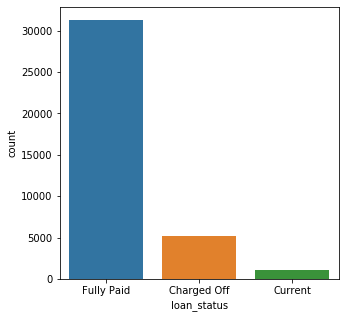

In [338]:
plt.figure(figsize=(5,5))
sns.countplot(x="loan_status", data=master_loan_df)
plt.show()

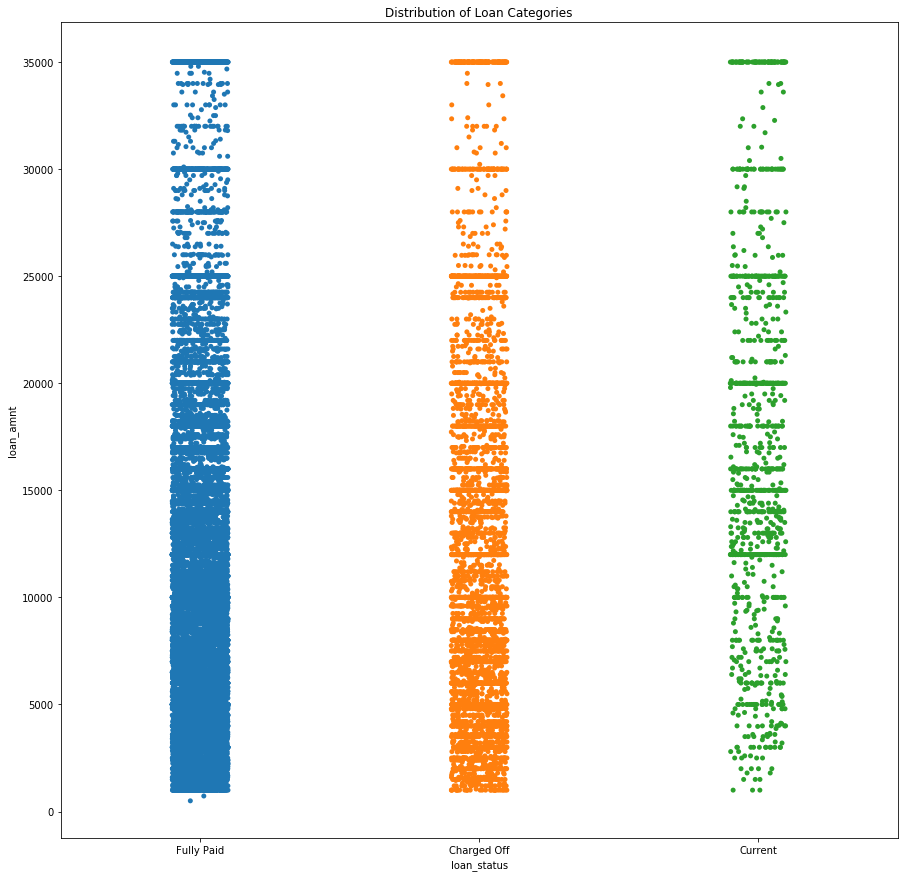

In [339]:
plt.figure(figsize=(15,15))
plt.title("Distribution of Loan Categories")
sns.stripplot(x="loan_status", y="loan_amnt", data=master_loan_df, jitter=1);
plt.show()

#### Get the Target Column which is 'loan status' and remove the 'Current' data as we are interested only in Charged Off/Default and Fully paid/Completed

In [340]:
# Filter only fully paid or charged-off
master_loan_df = master_loan_df[master_loan_df['loan_status'] != 'Current']

In [341]:
master_loan_df['defaulting'] = master_loan_df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
# summarising the values
master_loan_df['defaulting'].value_counts()

0    31293
1    5176 
Name: defaulting, dtype: int64

## Univariate Analysis

#### As we are interested in finding the `defaulted` loans we need to look at the charged-off categories

In [342]:
round(100*np.mean(master_loan_df['defaulting']), 2)

14.19

#### As seen above, approximately 15% of the loans are being `defaulted` based on the past data

### Data Analysis
#### 1.) Identify variables which are strong representative that a person is default.
#### 2.) Below are the columns representing the  applicant and loan characterstics.

#### Applicant:

addr_state, 
annual_inc, 
emp_length, 
emp_title, 
home_ownership, 
purpose, 
verification_status, 
zip_code


#### Loan:

grade,
dti,
funded_amnt
funded_amnt_inv
id
int_rate
open_acc
pub_rec
pub_rec_bankruptcies
sub_grade
term
total_acc
loan_amnt



In [343]:
def plotCountAndDefaultPercentageCategorical(loan_df, col):
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    
    gradeDeafultPercentage = (loan_df.groupby(col).agg( {'defaulting' : 'sum'}) / loan_df.groupby(col).agg( {'defaulting' : 'count'} ) * 100).reset_index()

    plot = sns.countplot(x=col, data=loan_df)

    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plt.xlabel(col)
    plt.ylabel('Count/Frequency')
    plt.title("Count Distribution of Values")
    
    plt.subplot(122)
    plot = sns.barplot(x=col, y='defaulting', data=gradeDeafultPercentage)

    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plt.xlabel(col)
    plt.ylabel('defaulting')
    plt.title("Default %")
    
    plt.show()

#### Let us now calculate the various grades in which the loans are getting defaulted

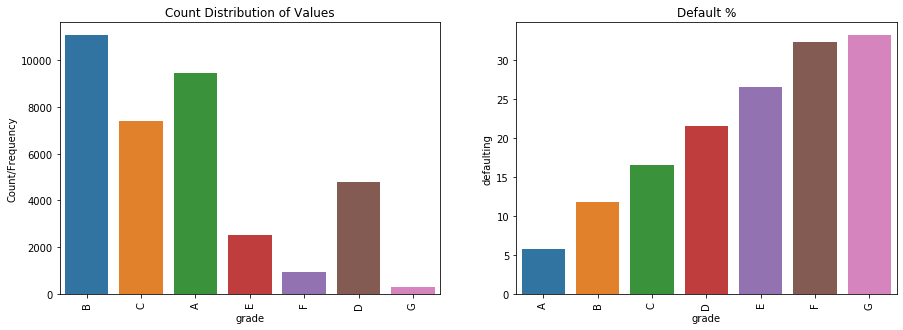

In [344]:
plotCountAndDefaultPercentageCategorical(master_loan_df, 'grade')

#### As seen above as the grade increased from A to G, the Charged-Off rate increases. Which clearly indicates there are more defaulting when grade increases, hence the riskness

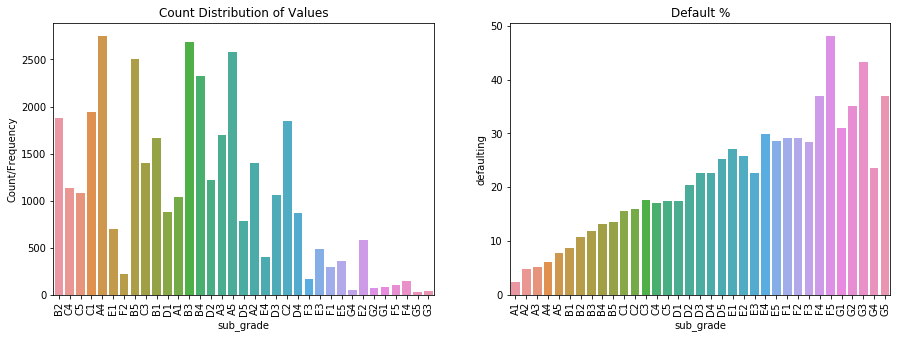

In [345]:
plotCountAndDefaultPercentageCategorical(master_loan_df, 'sub_grade')

#### From the above plot, we understand that similar to grades, as the subgrade increases the defaulting rate increases

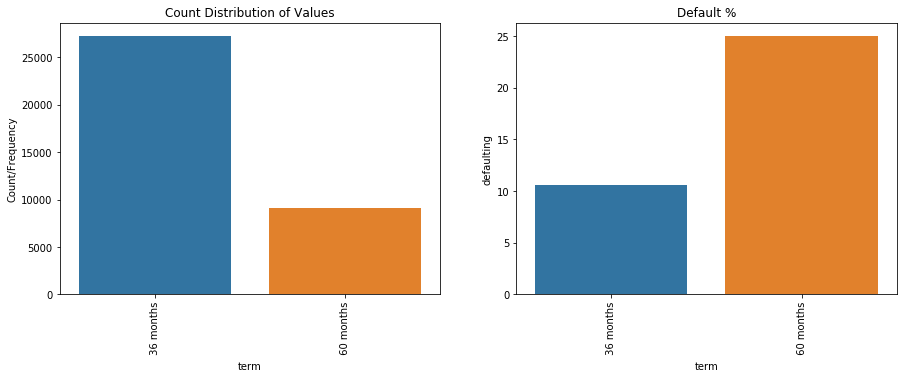

In [346]:
# Plot term vs the default rates
plotCountAndDefaultPercentageCategorical(master_loan_df, 'term')

#### As seen above, the long tenure loans are more defaulting than the short tenured ones

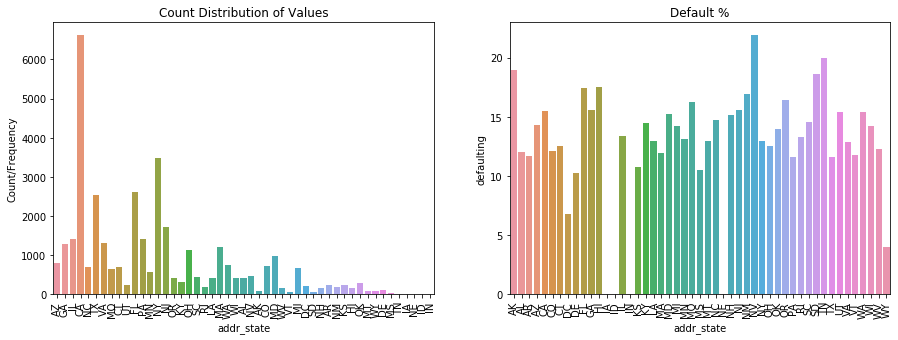

In [347]:
plotCountAndDefaultPercentageCategorical(master_loan_df, 'addr_state')

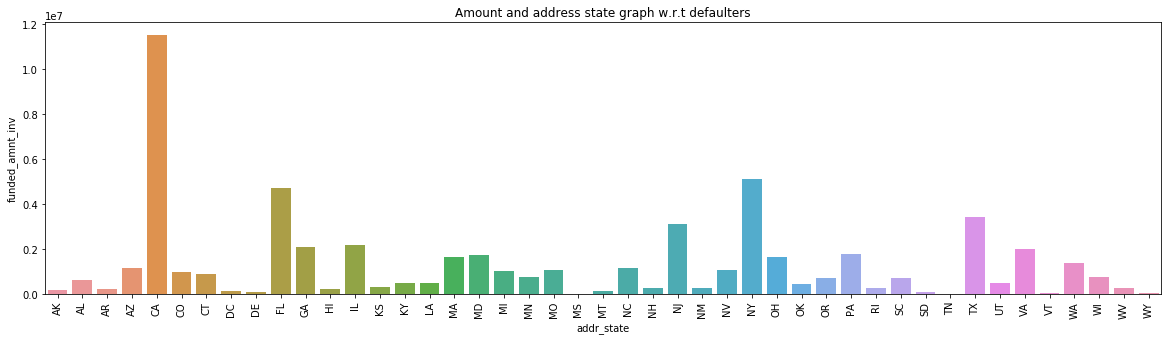

In [348]:
# Get the defaulters/Charged off and see which state has the highest charged off w.r.t to funded amount invested.
plt.figure(figsize=(20, 5))

amtInvPerAddr = master_loan_df[master_loan_df['defaulting'] == 1].groupby(['addr_state']).agg( {'funded_amnt_inv' : 'sum'}).reset_index()

plot = sns.barplot(x = 'addr_state', y = 'funded_amnt_inv', data = amtInvPerAddr)

plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.xlabel('addr_state')
plt.ylabel('funded_amnt_inv')
plt.title("Amount and address state graph w.r.t defaulters")
plt.show()

#### Above graph shows that CA is the top state where we have more defaulters w.r.t invested amount.

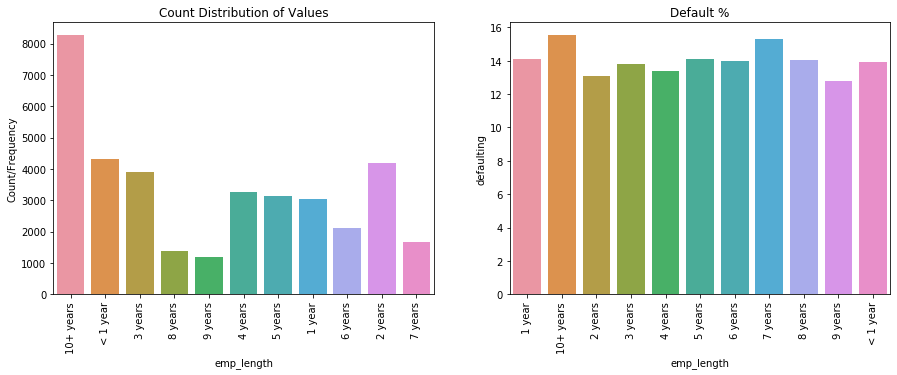

In [349]:
plotCountAndDefaultPercentageCategorical(master_loan_df, 'emp_length')

#### As seen above, the emp_length has minimal impact on the defaulting

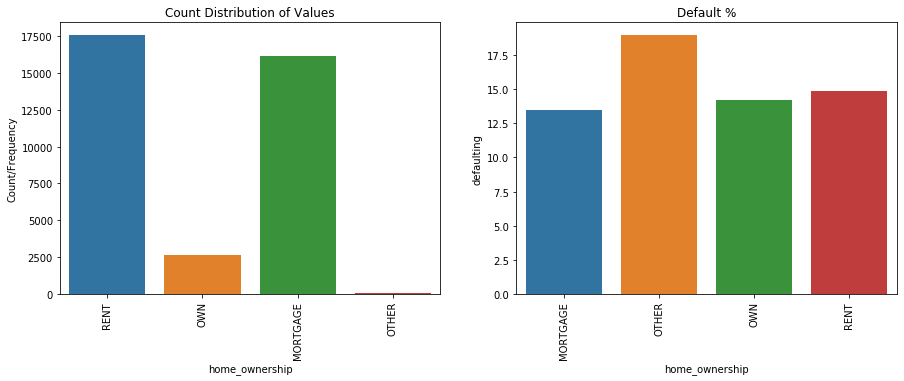

In [350]:
plotCountAndDefaultPercentageCategorical(master_loan_df, 'home_ownership')

#### As seen above, we can not much differentiate based on the home_ownership category

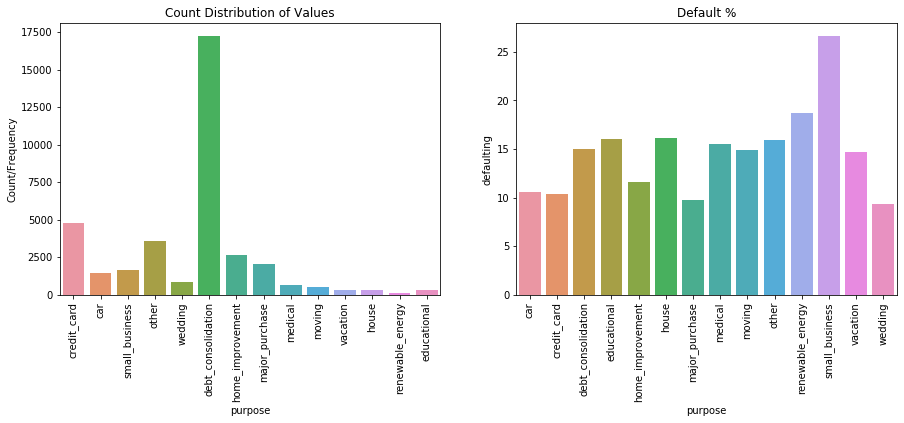

In [351]:
plotCountAndDefaultPercentageCategorical(master_loan_df, 'purpose')

#### As seen above, small_business loans default more followed by the renewable_energy loans

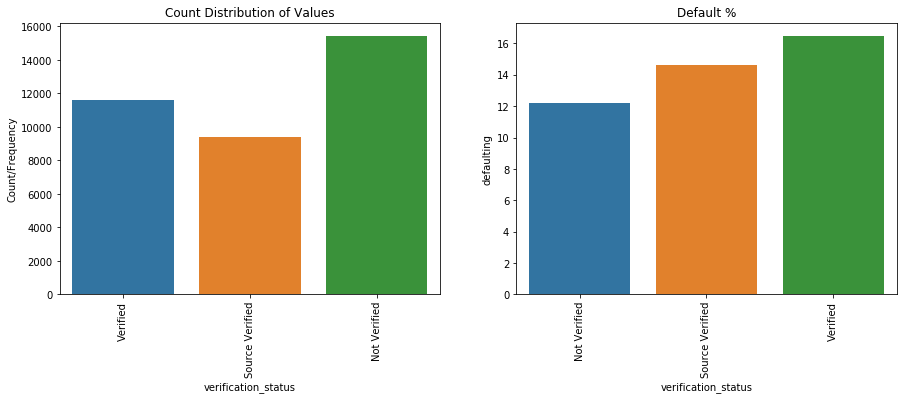

In [352]:
plotCountAndDefaultPercentageCategorical(master_loan_df, 'verification_status')

#### As seen above, verified loans default more than the Not-verified Loans

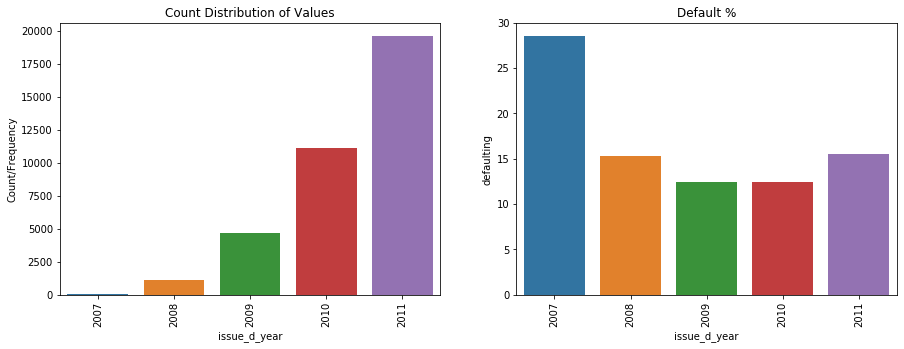

In [353]:
plotCountAndDefaultPercentageCategorical(master_loan_df, 'issue_d_year')

#### As seen above, there is a reduction in the default rate from 2007 till 2010. However in 2011, there is an increase in the default rate 

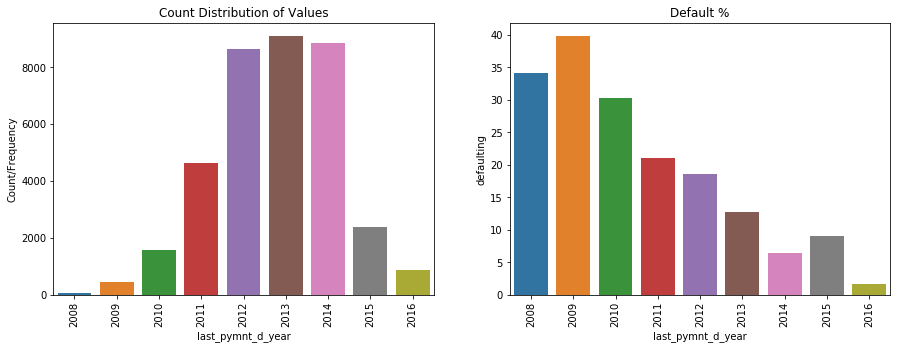

In [354]:
master_loan_df['last_pymnt_d_year']= master_loan_df['last_pymnt_d'].dt.year.astype('int64')
plotCountAndDefaultPercentageCategorical(master_loan_df, 'last_pymnt_d_year')

#### As seen above, in the year 2009, most defaults happened. This is due to the recession happened in the previous year

In [355]:
master_loan_df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5176.0,12253.806028,8065.242748,1000.0,6000.0,10000.0,16800.0,35000.0
Fully Paid,31293.0,10897.731921,7156.751445,500.0,5400.0,9600.0,15000.0,35000.0


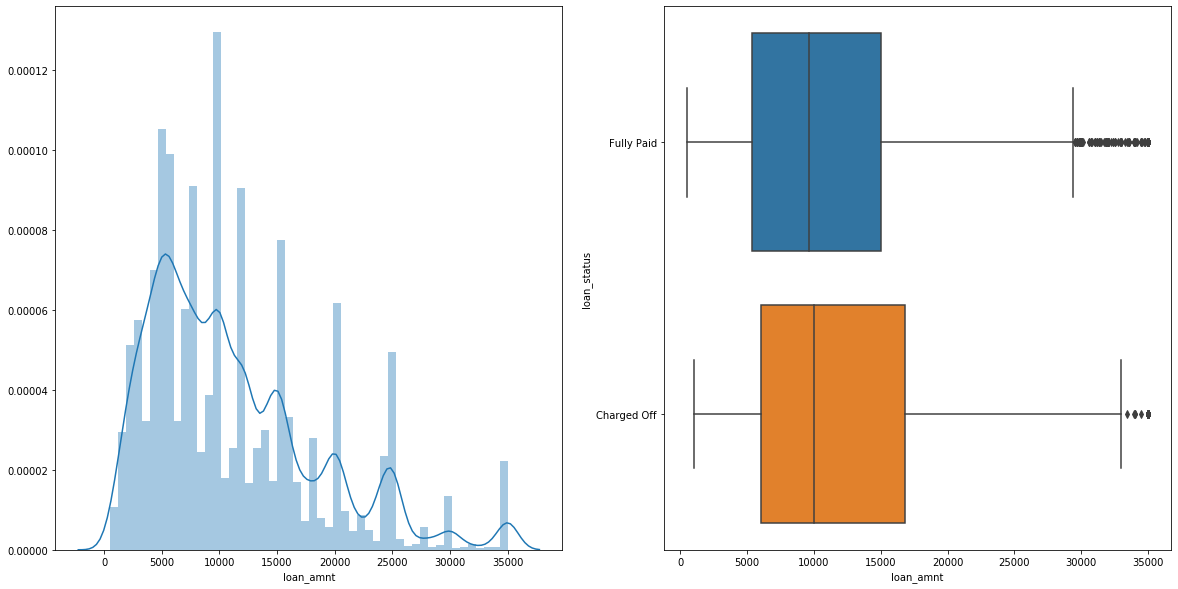

In [356]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
ax = sns.distplot(master_loan_df['loan_amnt'])
plt.subplot(1, 2, 2)
sns.boxplot(x=master_loan_df['loan_amnt'], y=master_loan_df['loan_status'], data=master_loan_df)
plt.show()

#### As seen above, the charged-off loans have higher mean than the fully paid loans.
#### Most of the loans granted are below 15000.
#### Also for every multiple of 5000, there is a spike. So we can set 5000 as the bucket size in creating the below plot

In [357]:
def plotCountAndDefaultPercentage(loan_df, bins, col):
    
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.hist(loan_df[col], bins = bins, edgecolor="k")
    
    plt.xticks(bins, rotation = "vertical")
    plt.xlabel(col)
    plt.ylabel('Count/Frequency')
    plt.title("Count Distribution of Values")
    
    
    plt.subplot(122)
    binnedcol = col + '_bins'
    loan_df[binnedcol] = pd.cut(loan_df[col], bins)
    
    defaultPercentage = (loan_df.groupby(binnedcol).agg( {'defaulting' : 'sum'}) / loan_df.groupby(binnedcol).agg( {'defaulting' : 'count'} ) * 100).reset_index()

    plot = sns.barplot(x=binnedcol, y='defaulting', data=defaultPercentage, )

    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plt.xlabel(binnedcol)
    plt.ylabel('Default %')
    plt.title("Percentage Defaulters")

    plt.tight_layout()
    plt.show()

#### Dti vs loan defaulting

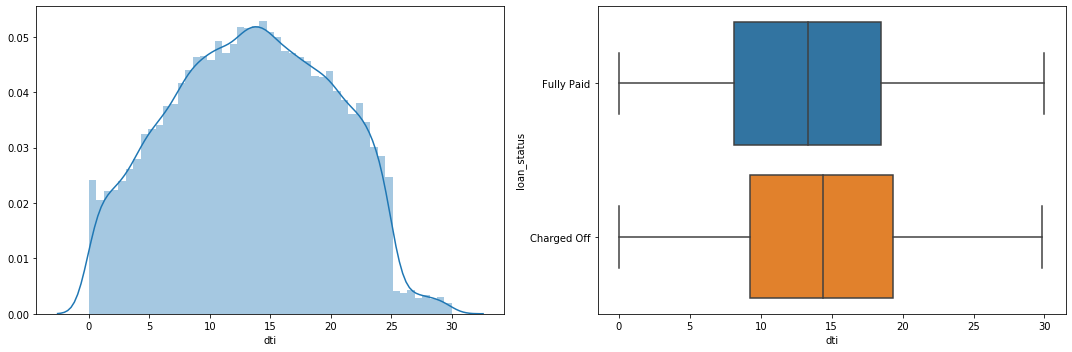

In [358]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax = sns.distplot(master_loan_df['dti'])
plt.subplot(1, 2, 2)
sns.boxplot(x=master_loan_df['dti'], y=master_loan_df['loan_status'], data=master_loan_df)
plt.tight_layout()
plt.show()

count    37558.000000
mean     13.426506   
std      6.641706    
min      0.000000    
25%      8.340000    
50%      13.510000   
75%      18.670000   
max      29.990000   
Name: dti, dtype: float64


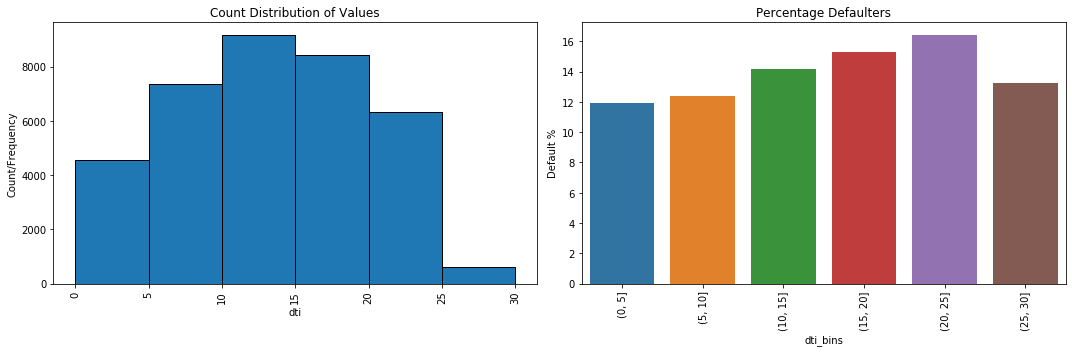

In [359]:
print (loan_df['dti'].describe())
bins = [i for i in range(0,31,5)]
plotCountAndDefaultPercentage(master_loan_df, bins, 'dti')

#### As seen above, when the dti is between 15 and 25, the defaulting is more

count    36469.000000
mean     11090.197839
std      7307.808308 
min      500.000000  
25%      5500.000000 
50%      9950.000000 
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


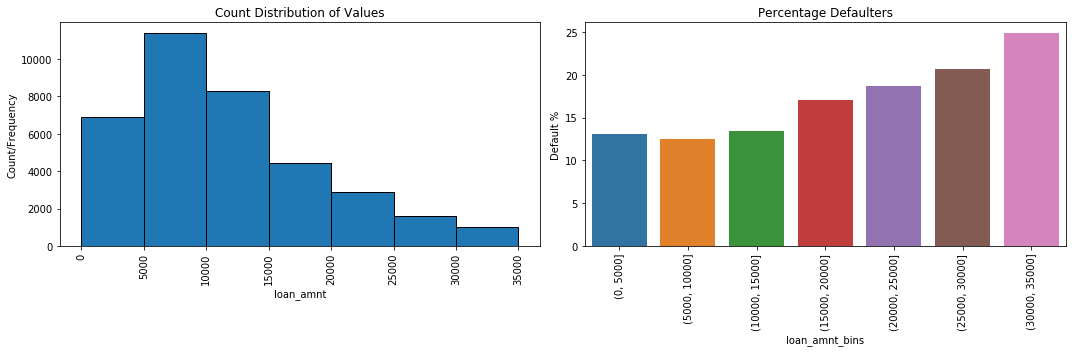

In [360]:
print(master_loan_df['loan_amnt'].describe())
bins = list (range(0,35001,5000))
plotCountAndDefaultPercentage(master_loan_df, bins, 'loan_amnt')

#### As seen above, as the loan bin bucket increases, the charged-off loans increase, which means the probability of being defaulted increases.

count    36469.000000
mean     10823.596753
std      7048.654101 
min      500.000000  
25%      5400.000000 
50%      9600.000000 
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


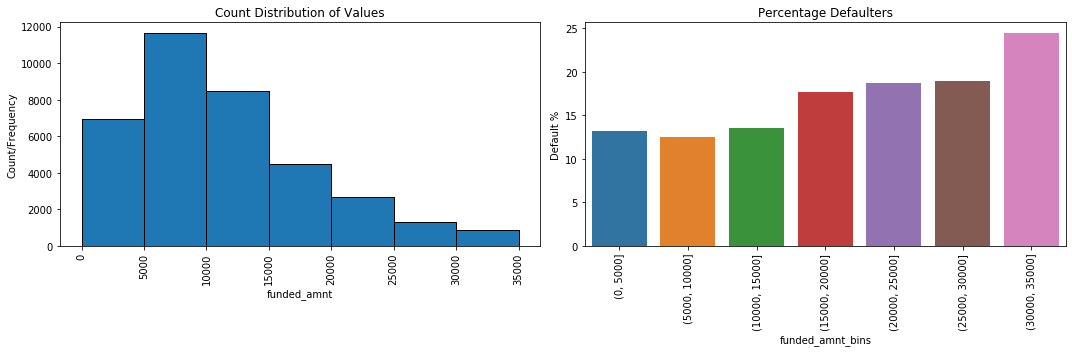

In [361]:
print (master_loan_df['funded_amnt'].describe())

bins = list (range(0,35001,5000))
plotCountAndDefaultPercentage(master_loan_df, bins, 'funded_amnt')

#### As seen above, as the funded bin bucket increases, the charged-off loans increase, which means the probability of being defaulted increases.

#### Monthly comparison of default loans

count    36469.000000
mean     11.969034   
std      3.695763    
min      5.420000    
25%      8.940000    
50%      11.830000   
75%      14.460000   
max      24.400000   
Name: int_rate, dtype: float64


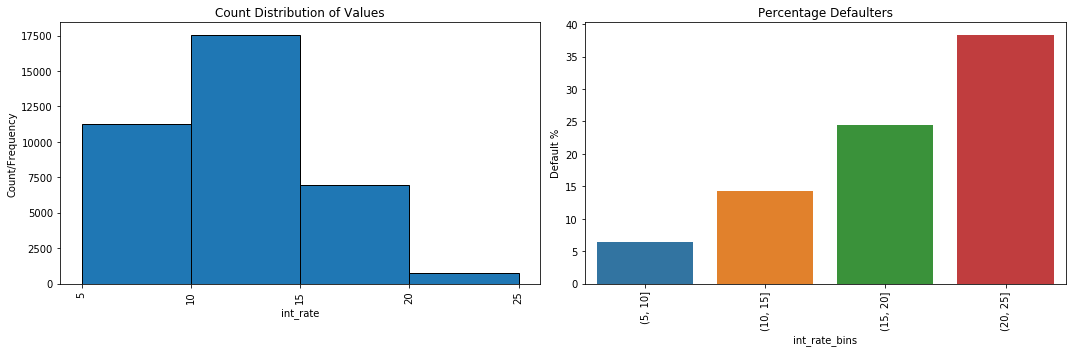

In [362]:
print (master_loan_df['int_rate'].describe())
bins = list (range(5,26,5))
plotCountAndDefaultPercentage(master_loan_df, bins, 'int_rate')

#### As seen above, as the interest rate increases, the defaulting increases linearly

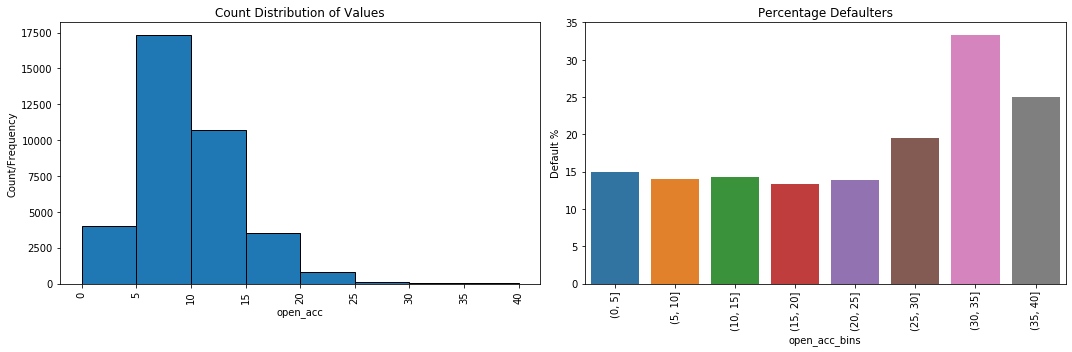

In [363]:
bins = list (range(0,45,5))
plotCountAndDefaultPercentage(master_loan_df, bins, 'open_acc')

#### As seen above, as the number of open accounts increases, the defaulting percentage increases

count    36469.000000
mean     0.041926    
std      0.201106    
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      0.000000    
max      2.000000    
Name: pub_rec_bankruptcies, dtype: float64


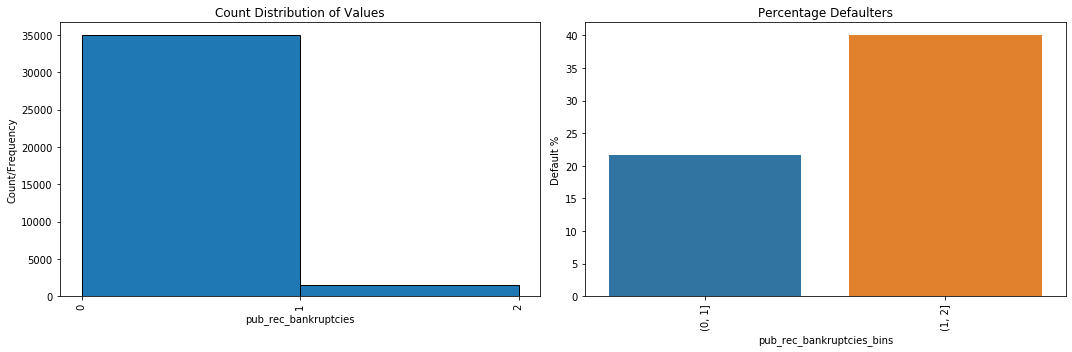

In [364]:
print (master_loan_df['pub_rec_bankruptcies'].describe())
bins = list (range(0,3,1))
plotCountAndDefaultPercentage(master_loan_df, bins, 'pub_rec_bankruptcies')

#### Create buckets for the installment amount and find the relationship to the defaulting

count    36469.000000
mean     323.085341  
std      206.796544  
min      16.080000   
25%      167.460000  
50%      279.570000  
75%      426.100000  
max      1305.190000 
Name: installment, dtype: float64


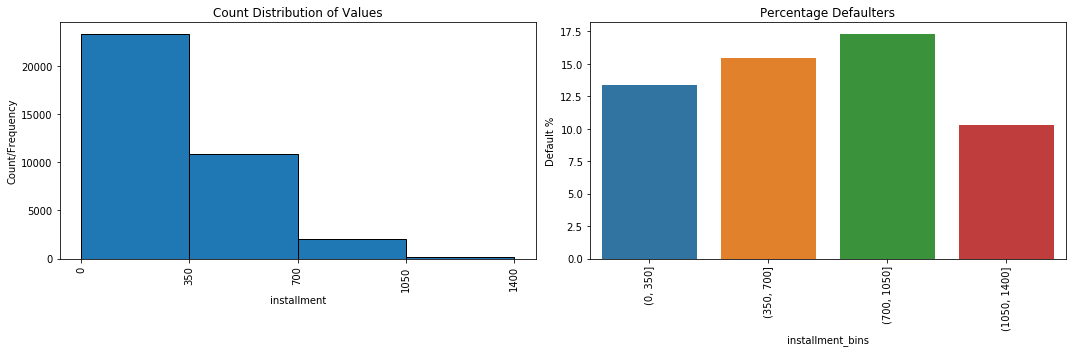

In [365]:
print (master_loan_df['installment'].describe())
bins = list (range(0,1401,350))
plotCountAndDefaultPercentage(master_loan_df, bins, 'installment')

#### As seen above, as the installement amount increases, the default rate increases except for the highest installment bucket of 1050-1400

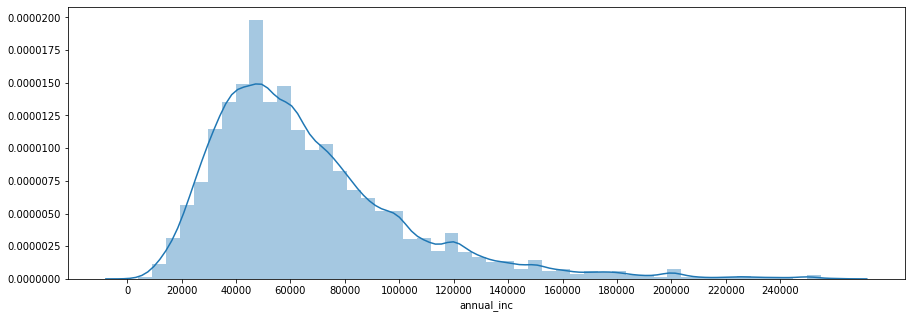

In [366]:
plt.figure(figsize=(15, 5))
sns.distplot(master_loan_df['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

count    36469.000000 
mean     66528.461004 
std      36327.547258 
min      4000.000000  
25%      41000.000000 
50%      59785.010000 
75%      82000.000000 
max      260000.000000
Name: annual_inc, dtype: float64


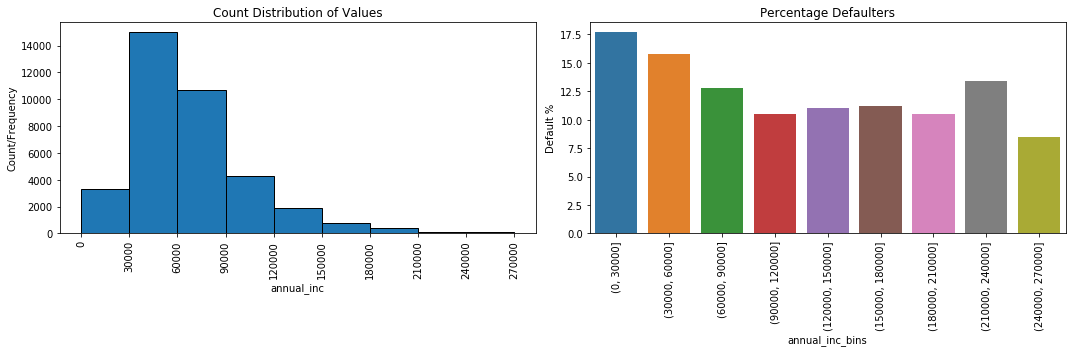

In [367]:
print (master_loan_df['annual_inc'].describe())
bins = list (range(0,270001,30000))
plotCountAndDefaultPercentage(master_loan_df, bins, 'annual_inc')

#### As seen above, lower the salary bucket, higher the default rate

#### Loan to income ratio Plot

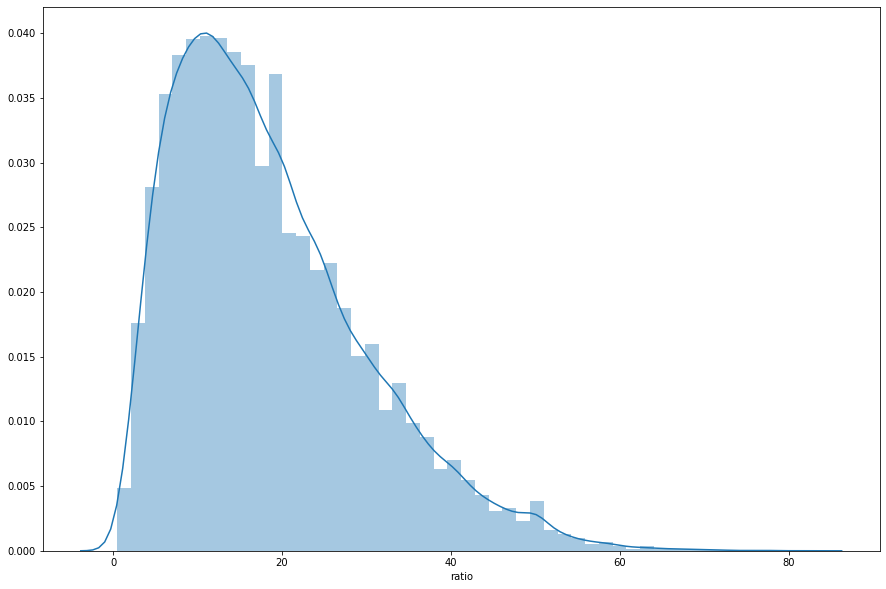

In [368]:
plt.figure(figsize=(15,10))
master_loan_df['ratio'] = master_loan_df['loan_amnt'] * 100 / master_loan_df['annual_inc']
sns.distplot(master_loan_df['ratio'])

count    36469.000000
mean     18.599146   
std      11.393127   
min      0.500000    
25%      10.000000   
50%      16.378705   
75%      25.000000   
max      81.967213   
Name: ratio, dtype: float64


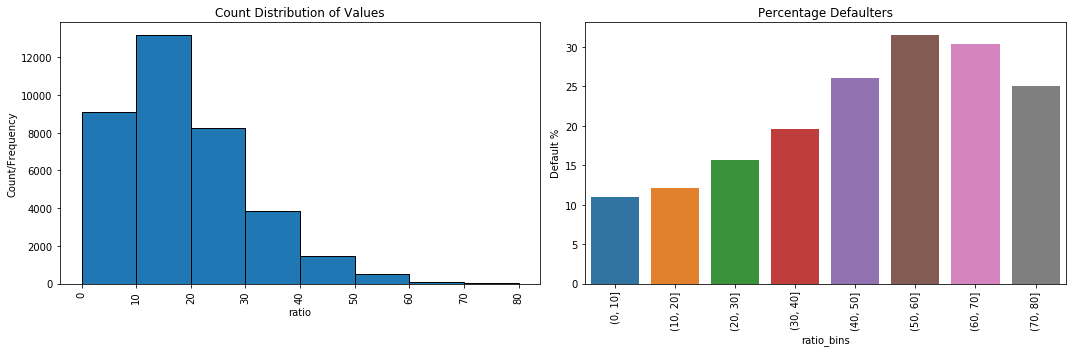

In [369]:
print (master_loan_df['ratio'].describe())
bins = list (range(0,90,10))
plotCountAndDefaultPercentage(master_loan_df, bins, 'ratio')

#### As seen above , when the loan amount is greater than or equal to 40% of the annual income, the defaulting increases

#### Credit Pull plot

In [370]:
master_loan_df['last_credit_pull_d_year']= master_loan_df['last_credit_pull_d'].dt.year.astype('int64')

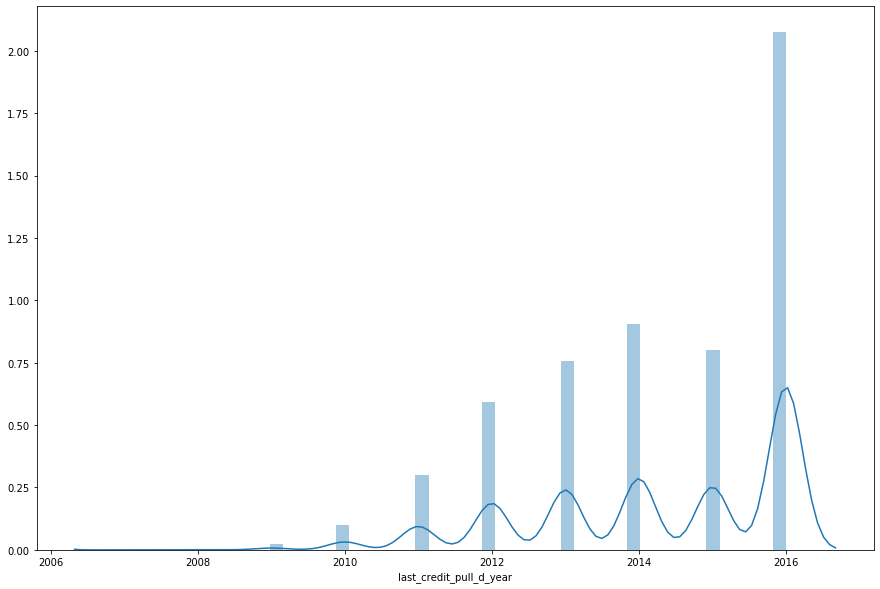

In [371]:
plt.figure(figsize=(15,10))
sns.distplot(master_loan_df['last_credit_pull_d_year'])
plt.show()

#### As seen above, Recently Lending Club is pulling more credit reports. It indicates that it is more serious about the bad loans recently

## Segmented Analysis

In [372]:
# Finding top5 purposes
top_5_purpose = master_loan_df.groupby('purpose')['loan_status'].count().sort_values(ascending = False).head(5)
print (top_5_purpose)
top_5_purpose_cat = top_5_purpose.index.get_level_values('purpose')
top_5_purpose_cat

purpose
debt_consolidation    17246
credit_card           4768 
other                 3568 
home_improvement      2670 
major_purchase        2036 
Name: loan_status, dtype: int64


Index(['debt_consolidation', 'credit_card', 'other', 'home_improvement',
       'major_purchase'],
      dtype='object', name='purpose')

In [373]:
top_5_purpose_df = master_loan_df[master_loan_df['purpose'].isin(top_5_purpose_cat)]

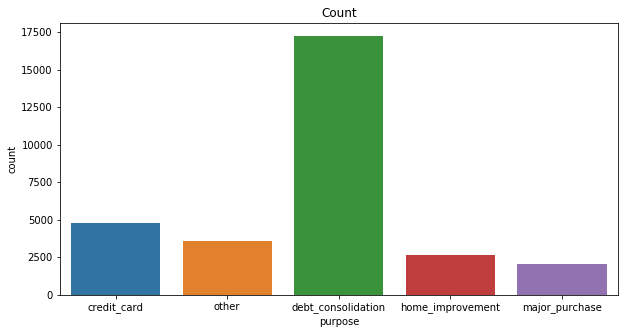

In [374]:
# Plotting the count of loans vs the top 5 purpose 
plt.figure(figsize = (10, 5))
sns.countplot(x = "purpose", data = top_5_purpose_df)
plt.title("Count")
plt.show()

#### Lets now compare the defaulting for the top 5 purposes based on tenure

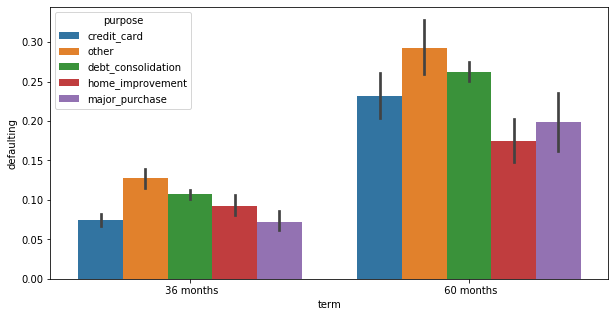

In [375]:
plt.figure(figsize=[10, 5])
sns.barplot(x='term', y="defaulting", hue='purpose', data=top_5_purpose_df)
plt.show()

#### Similarly compare the defaulting for the top 5 purposes based on home ownership

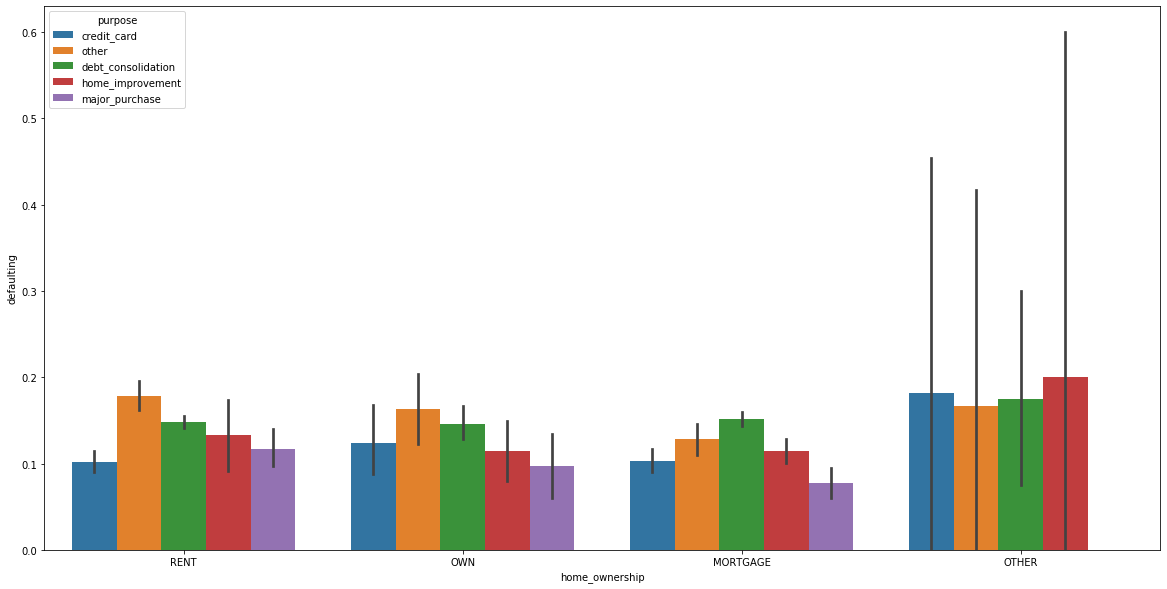

In [376]:
plt.figure(figsize=[20, 10])
sns.barplot(x='home_ownership', y="defaulting", hue='purpose', data=top_5_purpose_df)
plt.show()

#### Similarly compare the defaulting for the top 5 purposes based on grade

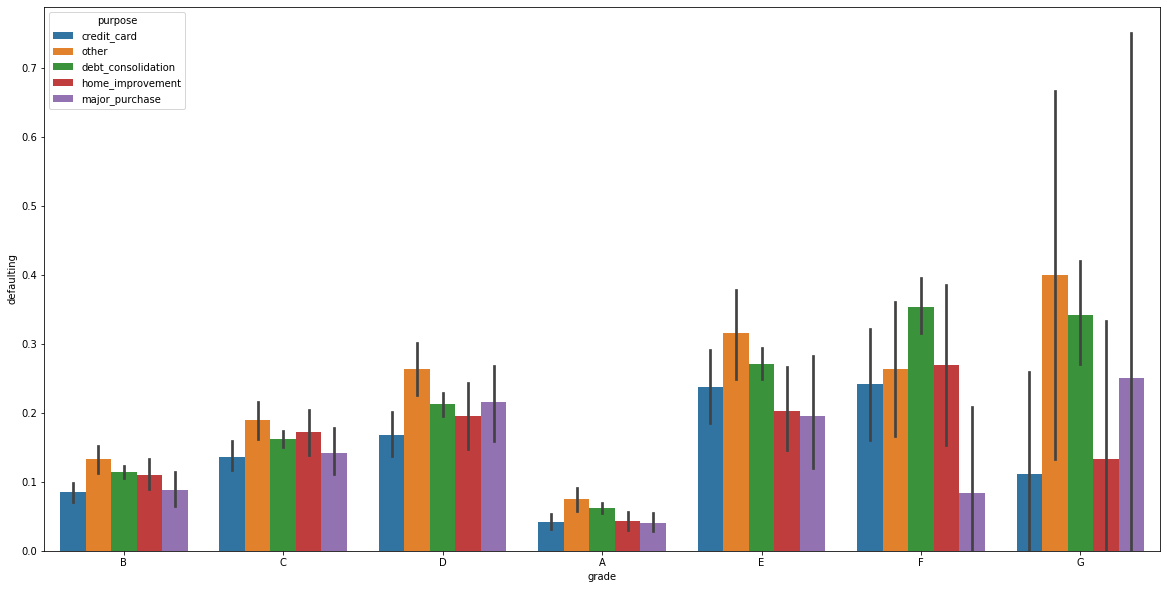

In [377]:
plt.figure(figsize=[20, 10])
sns.barplot(x='grade', y="defaulting", hue='purpose', data=top_5_purpose_df)
plt.show()

#### As shown above, The defaults are more for Higher Grades for debt consolidation

####  delinq_2yr vs loan amount vs grade

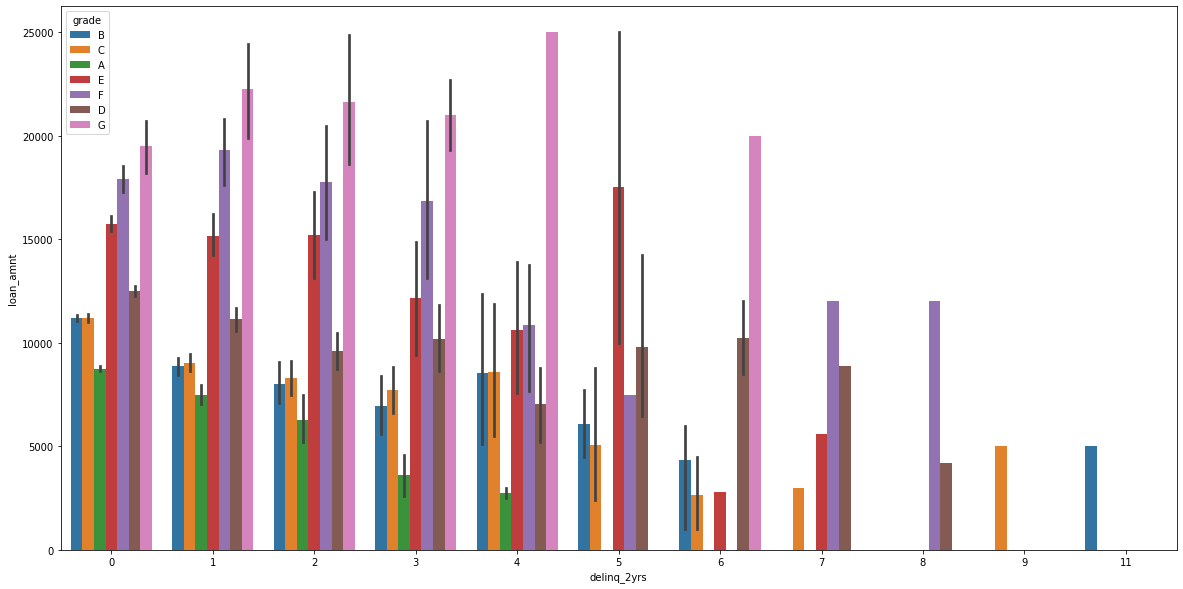

In [378]:
plt.figure(figsize=(20,10))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=master_loan_df)
plt.show()

#### As seen above, the loan amount reduces as the number of delinquicies increases. However there are still some grades getting loans for higher delinquicies or increase the interest rate to keep up with the delinquicies. Lending club should restrict them as they are considered risky

## Bivariate Analysis

#### Average loan amount over time

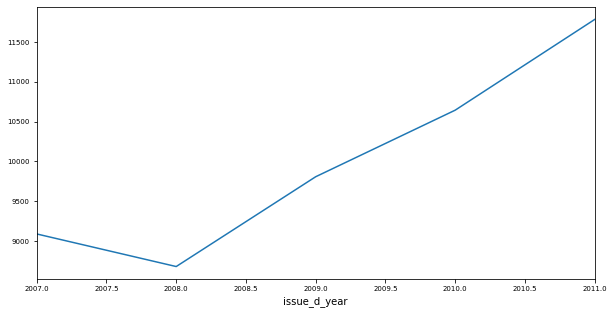

In [379]:
plt.figure(figsize=(10,5))
master_loan_df.groupby('issue_d_year').loan_amnt.mean().plot(kind='line', fontsize=7)
plt.show()

#### As seen above, During recession, the average loan amount steeply reduced

#### Loan Amount vs Annual Income plot

<Figure size 1440x720 with 0 Axes>

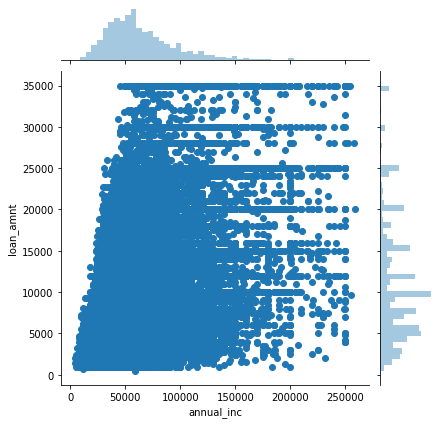

In [380]:
plt.figure(figsize=(20,10))
sns.jointplot('annual_inc', 'loan_amnt', master_loan_df.loc[master_loan_df['annual_inc']<max(master_loan_df['annual_inc'])])
plt.show()

#### As seen from the combined plot above, it is evident that those with annual income of 50k are taking loans of 25k. This is very risky for the lending club

#### Loan Amount vs Verification Status for Loan categories

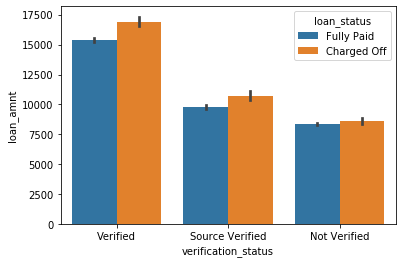

In [381]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=master_loan_df)

#### As seen above, verified loans are given higher loan amounts and subsequently end up with higher defaulting

#### Loan Amount vs Grade vs Term

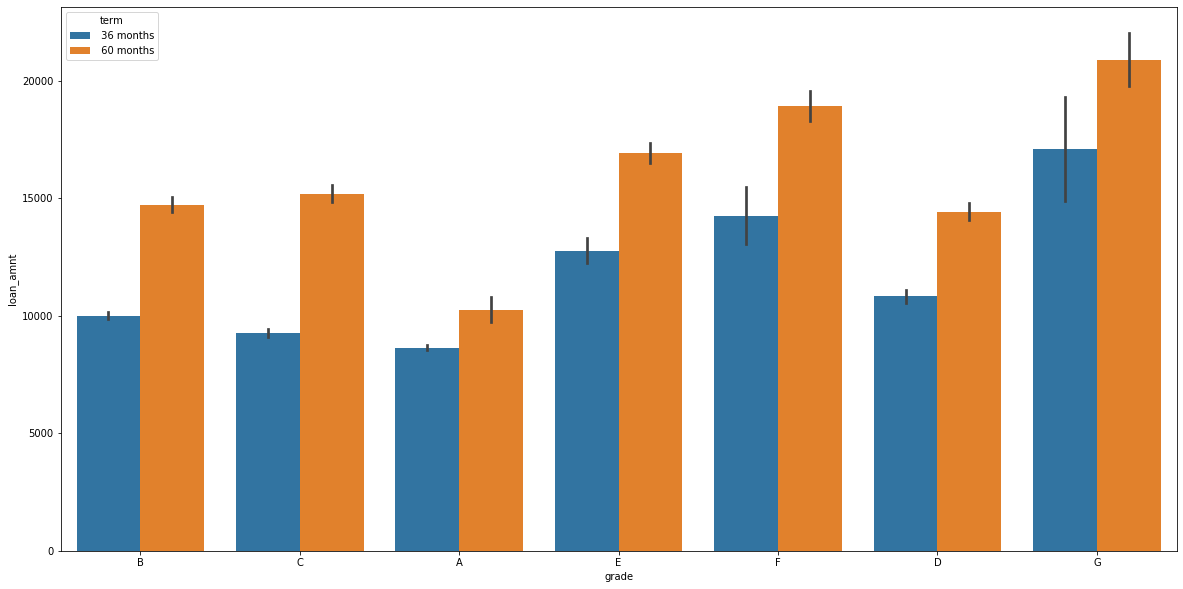

In [382]:
plt.figure(figsize=(20,10))
sns.barplot(x='grade', y='loan_amnt', hue="term", data=master_loan_df)
plt.show()

#### As seen above, higher Loans are given for lower grades for long duration

#### Interest rate vs Subgrade

<Figure size 1800x1080 with 0 Axes>

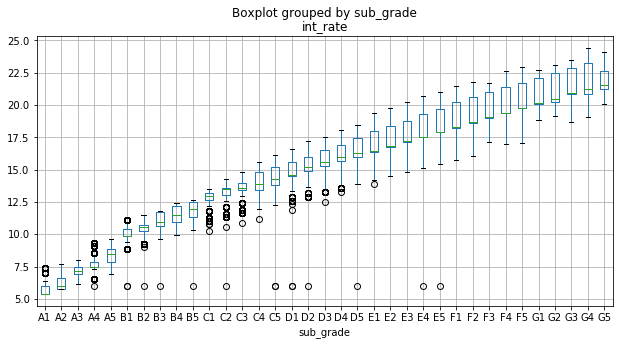

In [383]:
plt.figure(figsize=(25,15))
master_loan_df.boxplot(column='int_rate', by='sub_grade',figsize=(10,5))
plt.show()

#### As seen above, interest rate increased with the subgrade level

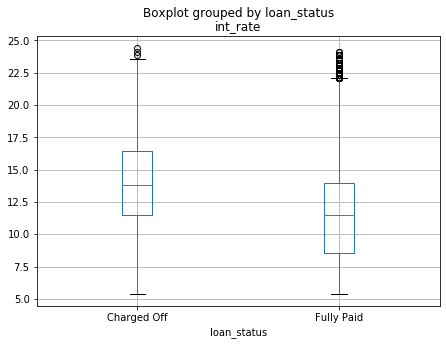

In [384]:
master_loan_df.boxplot(column='int_rate', by='loan_status',figsize=(7,5))

#### As seen above, higher the interest rate, more is the defaulting

#### Correlation between All variables

In [385]:
plt.figure(figsize=(20,20))
required_var= ['emp_length', 'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
               'delinq_2yrs', 'earliest_cr_line', 'revol_bal', 'revol_util', 'inq_last_6mths',
               'open_acc', 'pub_rec', 'total_acc', 'last_pymnt_amnt', 'pub_rec_bankruptcies']
corr = master_loan_df[required_var].corr()
corr.style.background_gradient(cmap='coolwarm')

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,revol_bal,revol_util,inq_last_6mths,open_acc,pub_rec,total_acc,last_pymnt_amnt,pub_rec_bankruptcies
loan_amnt,1,0.298057,0.930611,0.414263,0.0678644,-0.0366962,0.310873,0.0617049,0.00883901,0.171464,-0.0452177,0.250131,0.474856,-0.0299797
int_rate,0.298057,1,0.274675,0.0664214,0.110387,0.157992,0.0917457,0.466187,0.13519,0.00554625,0.0997878,-0.0506914,0.171843,0.0836249
installment,0.930611,0.274675,1,0.412132,0.0581575,-0.0255953,0.305674,0.0927373,0.00670048,0.167038,-0.0403911,0.223941,0.413631,-0.0272781
annual_inc,0.414263,0.0664214,0.412132,1,-0.117891,0.0277989,0.42193,0.0364413,0.0424409,0.254731,-0.0147492,0.373571,0.223626,-0.0134909
dti,0.0678644,0.110387,0.0581575,-0.117891,1,-0.0339188,0.240063,0.277994,0.00245873,0.294226,-0.00616827,0.233755,0.0117602,0.00592883
delinq_2yrs,-0.0366962,0.157992,-0.0255953,0.0277989,-0.0339188,1,-0.0589145,-0.0441532,0.00708012,0.0118266,0.010894,0.0661558,-0.0145161,0.00550448
revol_bal,0.310873,0.0917457,0.305674,0.42193,0.240063,-0.0589145,1,0.307341,-0.0243653,0.285048,-0.0588031,0.308758,0.12151,-0.0451148
revol_util,0.0617049,0.466187,0.0927373,0.0364413,0.277994,-0.0441532,0.307341,1,-0.0690759,-0.0889021,0.0584236,-0.0700958,-0.0174791,0.0606101
inq_last_6mths,0.00883901,0.13519,0.00670048,0.0424409,0.00245873,0.00708012,-0.0243653,-0.0690759,1,0.0944975,0.0237125,0.114519,0.0268475,0.0145186
open_acc,0.171464,0.00554625,0.167038,0.254731,0.294226,0.0118266,0.285048,-0.0889021,0.0944975,1,0.00480844,0.685066,0.0784576,0.0105785


<Figure size 1440x1440 with 0 Axes>

#### As seen above, interest rate has a correlation factor of 0.47 with revol_util. i.e., Company charges more int.rate for risky loans
#### However, the correlation factor between loan amount and the revol_bal are not convincing, indicating that higher amounts are sanctioned to risky customers